# Cardano Treasury Model

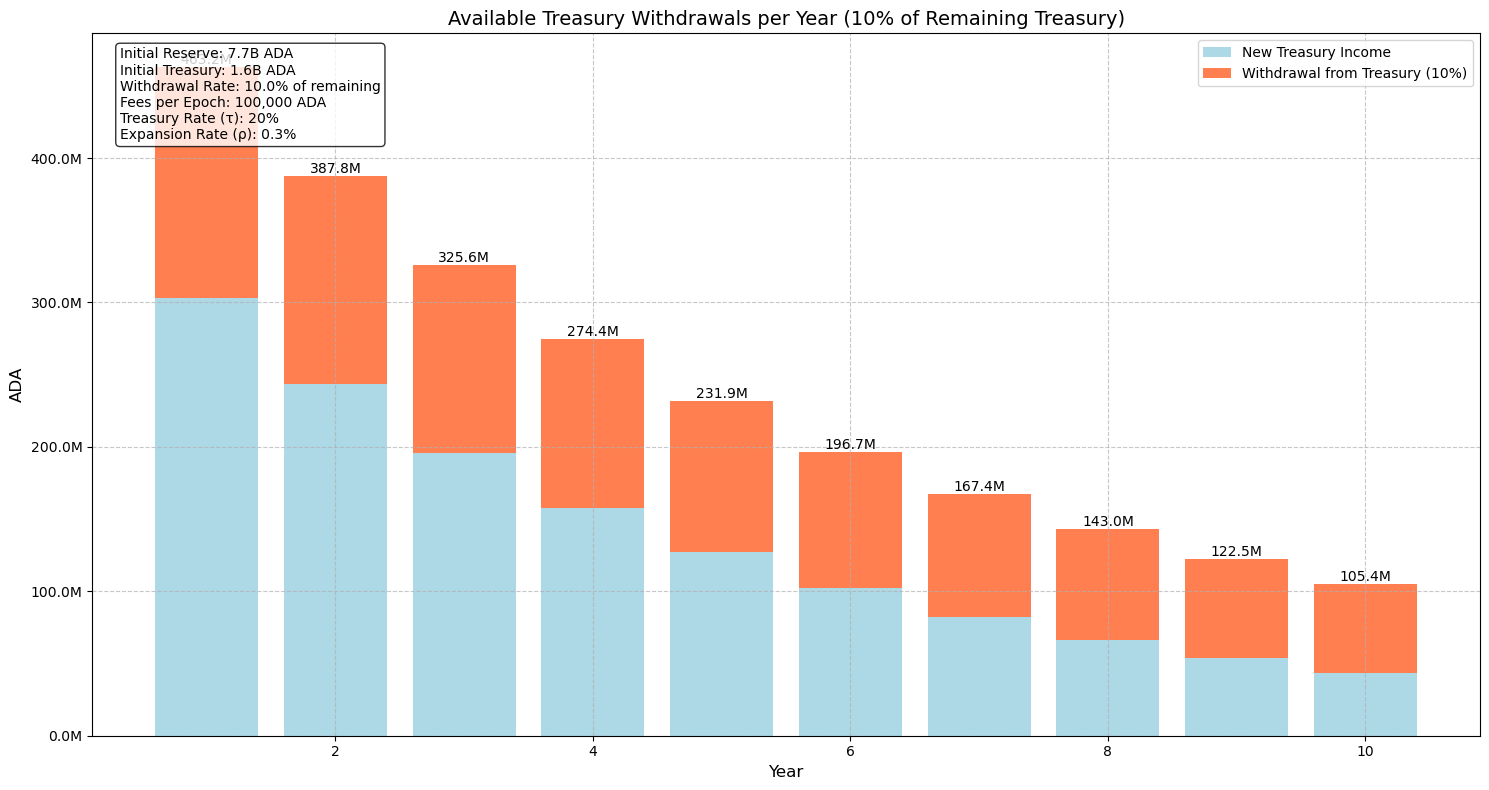


Detailed Withdrawal Breakdown:
--------------------------------------------------

Year 1:
Treasury Balance at Start: 1,600,000,000 ADA
New Treasury Income: 303,176,153 ADA
Withdrawal from Treasury (10%): 160,000,000 ADA
Total Available for Withdrawal: 463,176,153 ADA
Treasury Balance at End: 1,440,000,000 ADA

Year 2:
Treasury Balance at Start: 1,440,000,000 ADA
New Treasury Income: 243,755,372 ADA
Withdrawal from Treasury (10%): 144,000,000 ADA
Total Available for Withdrawal: 387,755,372 ADA
Treasury Balance at End: 1,296,000,000 ADA

Year 3:
Treasury Balance at Start: 1,296,000,000 ADA
New Treasury Income: 196,037,077 ADA
Withdrawal from Treasury (10%): 129,600,000 ADA
Total Available for Withdrawal: 325,637,077 ADA
Treasury Balance at End: 1,166,400,000 ADA

Year 4:
Treasury Balance at Start: 1,166,400,000 ADA
New Treasury Income: 157,716,550 ADA
Withdrawal from Treasury (10%): 116,640,000 ADA
Total Available for Withdrawal: 274,356,550 ADA
Treasury Balance at End: 1,049,760,000 A

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_treasury_for_epoch(
    fees: float,
    current_reserve: float,
    tau: float = 0.20,
    rho: float = 0.003
) -> dict:
    """Calculate treasury for a single epoch"""
    monetary_expansion = current_reserve * rho
    rewards_pot = fees + monetary_expansion
    treasury_portion = rewards_pot * tau
    next_reserve = current_reserve - monetary_expansion

    return {
        "monetary_expansion": monetary_expansion,
        "rewards_pot": rewards_pot,
        "treasury_portion": treasury_portion,
        "next_reserve": next_reserve
    }

# Parameters
INITIAL_RESERVE = 7_660_000_000
CURRENT_TREASURY = 1_600_000_000
WITHDRAWAL_RATE = 0.10  # 10% of remaining treasury each year
EPOCHS_PER_YEAR = 73
YEARS = 10
EPOCHS = EPOCHS_PER_YEAR * YEARS
FEES_PER_EPOCH = 100000  # 100k ADA

# Calculate yearly treasury income
yearly_treasury = []
current_reserve = INITIAL_RESERVE
treasury_this_year = 0

for epoch in range(EPOCHS):
    result = calculate_treasury_for_epoch(
        fees=FEES_PER_EPOCH,
        current_reserve=current_reserve
    )

    treasury_this_year += result["treasury_portion"]

    if (epoch + 1) % EPOCHS_PER_YEAR == 0:
        yearly_treasury.append(treasury_this_year)
        treasury_this_year = 0

    current_reserve = result["next_reserve"]

# Calculate withdrawal amounts and correct treasury balance
treasury_balances = [CURRENT_TREASURY]  # Start with current treasury
withdrawal_from_treasury = []
total_withdrawals = []

for i in range(YEARS):
    starting_balance = treasury_balances[-1]  # Get the last balance
    new_income = yearly_treasury[i]

    # Calculate withdrawal from treasury (10% of current balance)
    withdrawal = starting_balance * WITHDRAWAL_RATE
    withdrawal_from_treasury.append(withdrawal)

    # Total withdrawal is treasury withdrawal plus all new income
    total_withdrawal = withdrawal + new_income
    total_withdrawals.append(total_withdrawal)

    # Calculate ending balance (only reduced by the 10% withdrawal)
    ending_balance = starting_balance - withdrawal  # New income is withdrawn, not added
    treasury_balances.append(ending_balance)

# Create figure
plt.figure(figsize=(15, 8))

# Create stacked bar chart
years = np.arange(1, YEARS + 1)
plt.bar(years, yearly_treasury, label='New Treasury Income', color='lightblue')
plt.bar(years, withdrawal_from_treasury, bottom=yearly_treasury,
        label='Withdrawal from Treasury (10%)', color='coral')

# Add total values on top of bars
for i in range(len(years)):
    plt.text(years[i], total_withdrawals[i], f'{total_withdrawals[i]/1e6:.1f}M',
             ha='center', va='bottom')

plt.xlabel('Year', fontsize=12)
plt.ylabel('ADA', fontsize=12)
plt.title('Available Treasury Withdrawals per Year (10% of Remaining Treasury)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Format y-axis labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Add text box with parameters
param_text = f'Initial Reserve: {INITIAL_RESERVE/1e9:.1f}B ADA\n' \
             f'Initial Treasury: {CURRENT_TREASURY/1e9:.1f}B ADA\n' \
             f'Withdrawal Rate: {WITHDRAWAL_RATE*100}% of remaining\n' \
             f'Fees per Epoch: {FEES_PER_EPOCH:,} ADA\n' \
             f'Treasury Rate (τ): 20%\n' \
             f'Expansion Rate (ρ): 0.3%'

plt.text(0.02, 0.98, param_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Withdrawal Breakdown:")
print("-" * 50)
for year in range(YEARS):
    print(f"\nYear {year + 1}:")
    print(f"Treasury Balance at Start: {treasury_balances[year]:,.0f} ADA")
    print(f"New Treasury Income: {yearly_treasury[year]:,.0f} ADA")
    print(f"Withdrawal from Treasury (10%): {withdrawal_from_treasury[year]:,.0f} ADA")
    print(f"Total Available for Withdrawal: {total_withdrawals[year]:,.0f} ADA")
    print(f"Treasury Balance at End: {treasury_balances[year+1]:,.0f} ADA")

print("\nSummary:")
print("-" * 50)
print(f"Initial Treasury Balance: {treasury_balances[0]:,.0f} ADA")
print(f"Total New Treasury Income Over {YEARS} Years: {sum(yearly_treasury):,.0f} ADA")
print(f"Total Withdrawals from Treasury: {sum(withdrawal_from_treasury):,.0f} ADA")
print(f"Total Available for Withdrawal Over {YEARS} Years: {sum(total_withdrawals):,.0f} ADA")
print(f"Final Treasury Balance: {treasury_balances[-1]:,.0f} ADA")